In [1]:
# Basic Necessities
import pandas as pd


# Plotting Packages
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/train_clean_data.csv')
data.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21465 entries, 0 to 21464
Data columns (total 4 columns):
tweet_id      21465 non-null int64
sentiment     21465 non-null object
tweet_text    21465 non-null object
clean_text    21465 non-null object
dtypes: int64(1), object(3)
memory usage: 670.9+ KB


# Data Distribution

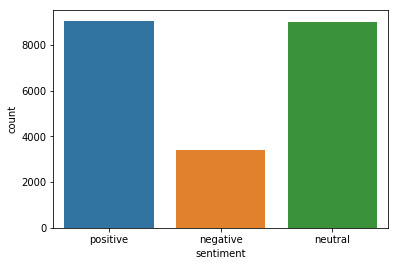

In [4]:
sns.countplot(x='sentiment',data=data)

# Before and After Cleaning - Word Frequency Graph

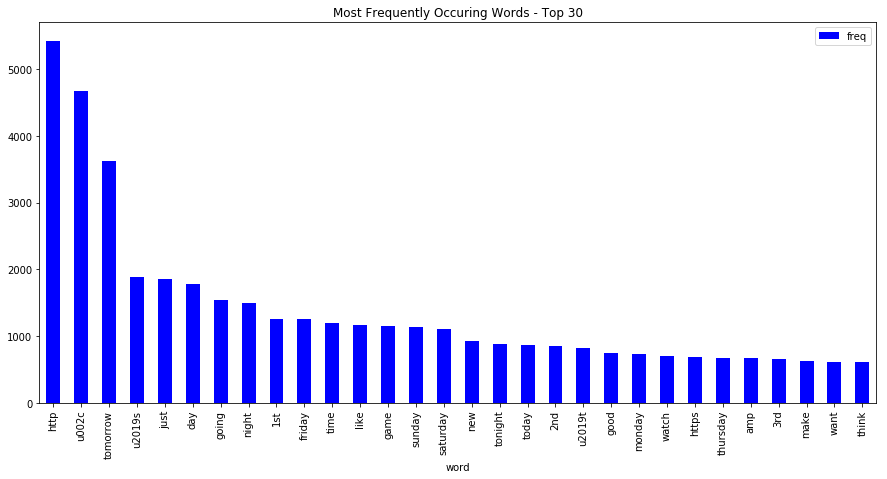

In [5]:
# Before Cleaning and Stopwords Removal
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data['tweet_text'])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")
plt.savefig('plots/before_cleaning')
plt.show()

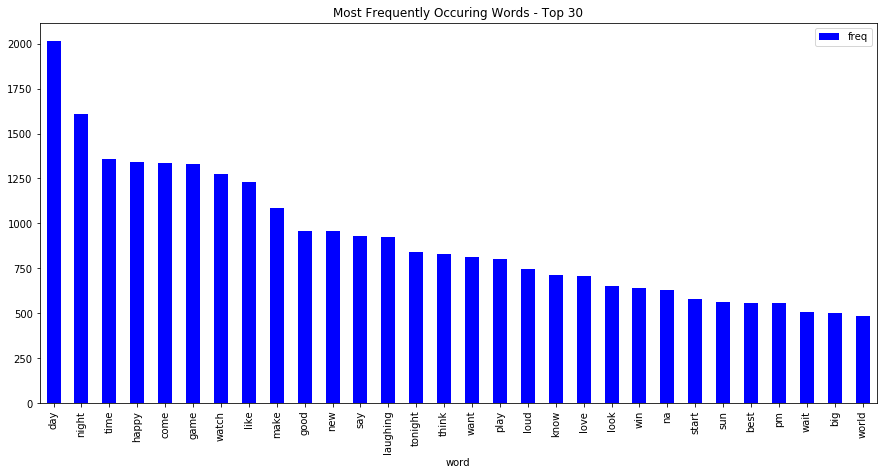

In [6]:
#After Cleaning and Stopwords Removal
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data['clean_text'])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")
plt.savefig('plots/after_cleaning')
plt.show()

# Word Cloud

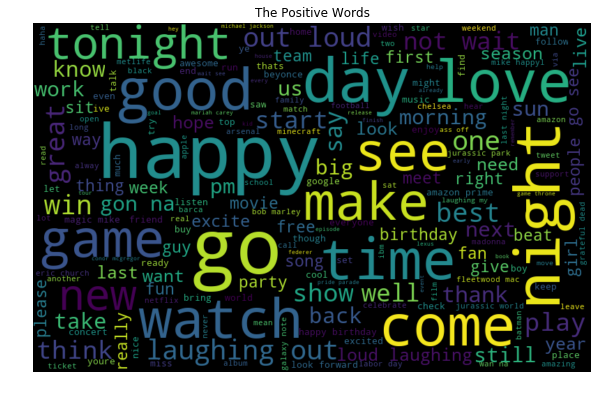

In [7]:
#Positive Word Cloud
normal_words =' '.join([text for text in data['clean_text'][data['sentiment'] == 'positive']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Positive Words')
plt.savefig('plots/positive_word_cloud')
plt.show()


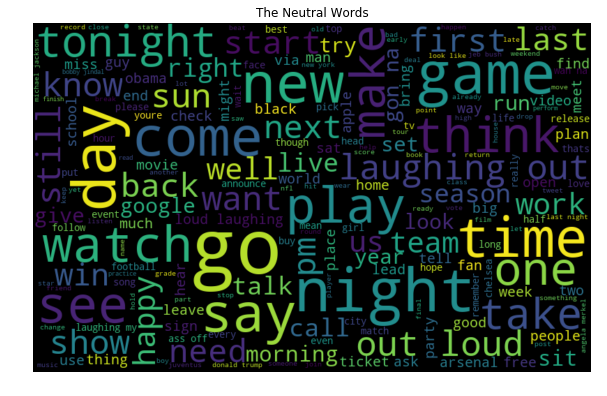

In [8]:
#Neutral Word Cloud
normal_words =' '.join([text for text in data['clean_text'][data['sentiment'] == 'neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.savefig('plots/neutral_word_cloud')
plt.show()

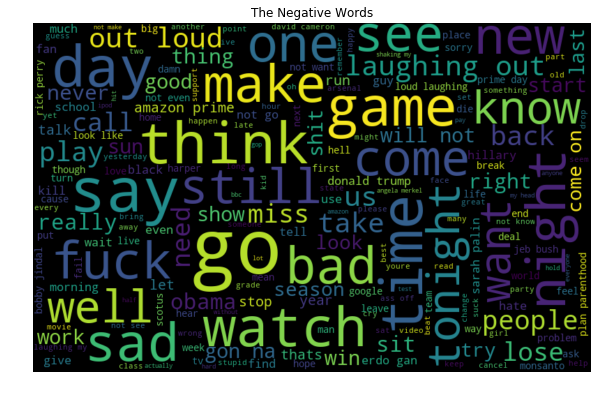

In [9]:
#Negative Word Cloud
normal_words =' '.join([text for text in data['clean_text'][data['sentiment'] == 'negative']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.savefig('plots/negative_word_cloud')
plt.show()